### <a id='intro'></a>
# Introduction


>The dataset is based on information collected from 100k medical appointments in Brazil for three months (April, May, June) in 2016 and looks at whether or not patients attended their appointments.
>

####   A number of characteristics about the patient are included in each row:

    1) ScheduledDay: indicates the day the patient made their appointment.
    2) Neighborhood: indicates the location of the hospital.
    3) Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    4) Gender and Age: consists of gender and age.
    5) Chronic condition:  Hypertension,Diabetes,Alcoholism, Handcap(with four catagories).
    6) Did they receive SMS or not?
    7) Did they show up?
####    Descriptive statistics will be used to answer the following question :    
    1) Is gender affect no of no show? 
    2) Is no show increase in specific days?
    3) Will it be considered a no show if the patient does not show up more than once?
    4)  Is difference days between appointment and schadule affect ?
    Those questions may figure out the most effective no-show indicator.    

In [1]:
# Import statements for all of my required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling

> I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

Load the table and print it.

In [2]:
# Load dataset and print out a few lines to inspect data
df=pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


How many rows and columns.

In [3]:
df.shape # no of rows and columns
print("There are {} rows and {} columns.".format(df.shape[0],df.shape[1]))

There are 110527 rows and 14 columns.


Check any duplicated rows.

In [4]:
print("There are {} duplicated rows.".format(df.duplicated().sum())) # make sure no duplicate value

There are 0 duplicated rows.


Check the missing data.

In [5]:
df.isnull().any() # make sure no null value

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

#### There are 110527 columns and 14 rows without any null values or duplicate rows.

#### In order to make more thorough investigation, it is preferable to make sure the column names and data type are consistent.


Change columns names to lowercase and any space or character to underscore . 

In [6]:
# Lowercase the colomn name and delete any spaces.
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.rename(columns={'no-show':'no_show','scheduledday':'scheduled_day','appointmentday':'appointment_day'}, inplace=True)
df.head()

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Check columns Data type.

In [7]:
df.info() # Information about data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patientid        110527 non-null  float64
 1   appointmentid    110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hipertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handcap          110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Patient ID should be converted to string to give better view then print it to check changes.  

In [8]:
# adjuste PatientId coloumn from float to string
df['patientid'] = df['patientid'].astype(np.int64).astype(str)
df.head(2)

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


#### Schedule and appointment dates must be date data types and print dataset to confirm changes.

In [9]:
# Change Scheduled and appointment day to datetime formate
df['appointment_day']=pd.to_datetime(df['appointment_day']).dt.date
df['scheduled_day']=pd.to_datetime(df['scheduled_day']).dt.date
df.head(2)

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


Two more column are needed to answer our question.

1) Week days column displays weekday name for the appointments .

2) Difference number of days column displays the difference number of days between schedule and appointment  days.

In [10]:
# add two more columns week-day of appointment and the difference number between schedule and appointment  days.
#I will need on my investigation.
df['appointment_week_day']=pd.to_datetime(df['appointment_day']).dt.strftime('%a')
df["diff_no_days"]=(df['appointment_day']-df['scheduled_day']).dt.days
df['diff_no_days'] = [round(a,-1) for a in df['diff_no_days']] # bin difference no of days

Confirm the change

In [11]:
# confirm the change
df.head(2)

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_week_day,diff_no_days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Fri,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Fri,0


Get some statistics about dataset (mean, max, min,....).

In [12]:
df.describe() # Get some statistics about dataset.

,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,diff_no_days
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.906539
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.673174
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,180.000000


We have an age with a minse value and maximum is 115, and also difference day column with a minse value.
so we have to investigate age distribution, then difference day.

,age
mean,37.088874
max,115.000000
min,-1.000000


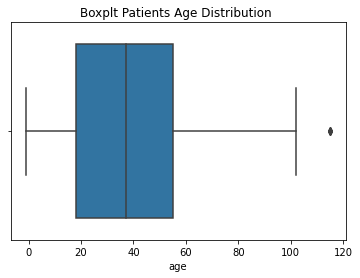

In [13]:
# investigate age distribution .
sns.boxplot(x=df['age']);
plt.title('Boxplt Patients Age Distribution ')
pd.DataFrame(df['age'].describe().loc[['mean','max','min']])

the chart shows most patients are between age 20 and 60.
The maximum age 115 in statistics is outlier 

#### First, The age 115 outlier will be dropped.

In [14]:
# Drop age outlier.
df.drop(df[df['age']==115].index, inplace=True)

#### Second, We will examine this patient's record with a minus sign to see if there is another record that can correct his age.


In [15]:
# find min record. 
min_age=df.age.min()
df[df['age']== min_age]

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_week_day,diff_no_days
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,Mon,0


#### This patient only has one record, and it appears that it is a wrong entry, so we will discard it.


In [16]:
#find the patient record and delete it.
df[df['patientid']=='465943158731293']
df.drop(df[df['patientid']=='465943158731293'].index, inplace=True)

Bin age for better view.

In [17]:
# bin age 
df['age'] = [round(a,-1) for a in df['age']]

Confirm our change and check our statistics again

In [18]:
df['age'].describe()

count    110521.000000
mean         37.022738
std          23.393793
min           0.000000
25%          20.000000
50%          40.000000
75%          60.000000
max         100.000000
Name: age, dtype: float64

Age displays in proper numbers

#### Investigate difference number of days negative value, is it problem in data type, if not we will see those values.

In [19]:
#check datatype
df.diff_no_days.dtype

dtype('int64')

It is integar data type, so check number of the negative value and it have relation with no_show.

In [20]:
# check number of the negative value and it have relation with no_show.
neg_diff=df.query('diff_no_days < 0')
neg_diff.no_show.value_counts()

Yes    1
Name: no_show, dtype: int64

In [21]:
#### only one record , it  seems wrong entery so we will drop it.

In [22]:
# drop negative value row and check.
df.drop(df[df.diff_no_days<0].index, inplace=True)
df.shape

(110520, 16)

#### only one record so we will delete it.

We do not need Appointment ID coloumn, so we will drop it also

In [23]:
# We do not need Appointment ID coloumn, so we will drop it
df.drop(['appointmentid'] ,axis=1, inplace=True)

In [24]:
print("Now there are {} rows and {} columns.".format(df.shape[0],df.shape[1]))

Now there are 110520 rows and 15 columns.


In [25]:
#number of patiant
print("No of patients in this data set is ",df['patientid'].nunique())

No of patients in this data set is  62296


#### This period had seen 62296 patients, which made 110526 appointments.
#### We will examine number of no shows in comparison to total appointments.

In [26]:
# find no show %
print("Total present appointment",df['no_show'].value_counts()[0])
print("Total No Show appointment",df['no_show'].value_counts()[1])
print("Total appointments       ",df['no_show'].count())

Total present appointment 88205
Total No Show appointment 22315
Total appointments        110520


Plot no_show percentage from all appointments.

,no_show
No,88205
Yes,22315


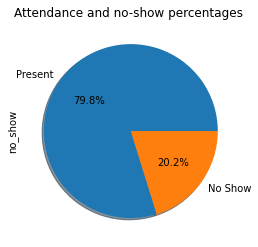

In [27]:
# plot show %
noshow_percentage=df['no_show'].value_counts()/df['no_show'].count()*100
noshow_percentage.plot.pie(autopct='%1.1f%%', shadow=True, labels=['Present', 'No Show'],legend=None);
plt.title("Attendance and no-show percentages ");
pd.DataFrame(df['no_show'].value_counts())

We can see the no-show perecentage is 20% from all appointment which is 1/5 of all appointments.

Investigate our data by Histogram to give me clear view of the data.

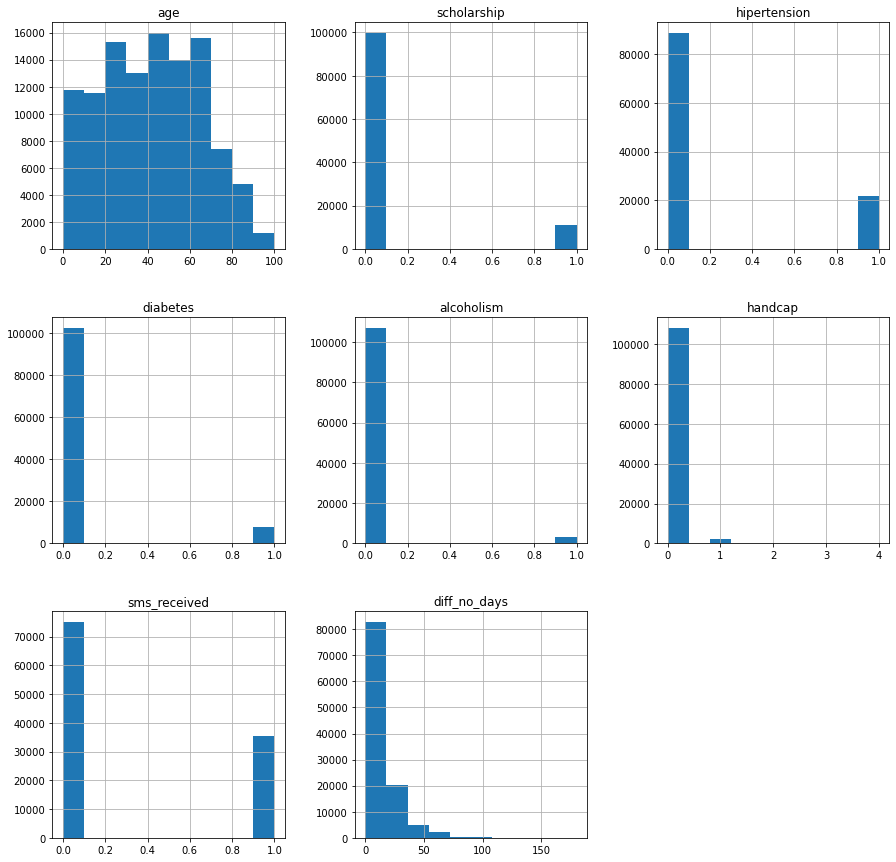

In [28]:
0# investigate our data
df.hist(figsize=(15,15));

Chronic conditions (Alcoholism, Diabetes, Hypertension, Diabetes, Diabetes, etc.) or those on scholarships are very few compared to all other patients.
Different number of days(waitting days) skewed to left.
Most of appointments did not receive SMS.

A new dataframe for no-show data only, it will help to figure datain more clear way.

In [29]:
#make a new frame for no-show data only
df_no_show=df.query('no_show == "Yes"')# new dataframe to only no_shows

Again, Investigate our data for no-show only by Histogram to give me clear view of the data.

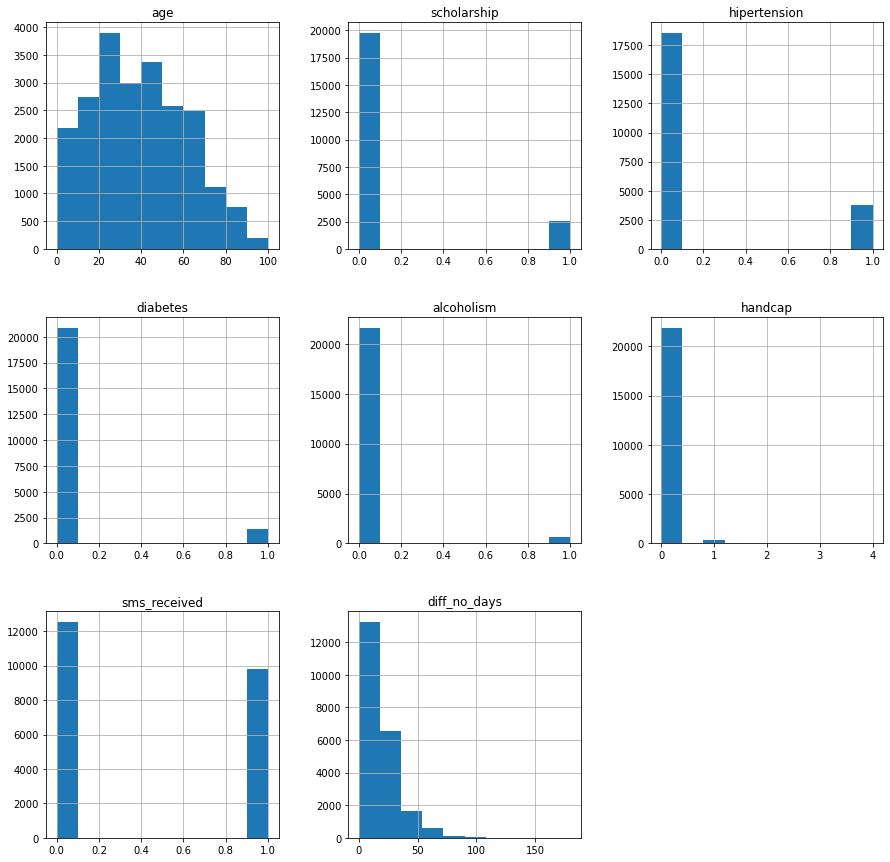

In [30]:
# which elements affect mostly on no show
df_no_show.hist(figsize=(15,15));

Chronic conditions (Alcoholism, Diabetes, Hypertension, Diabetes, Diabetes, etc.) or those on scholarships are very few compared to all other patients.
Looking at the percentage of no shows for each category, it is evident they are few in number.
Number of patients who received SMS is less than Number of patients who did not receive SMS, but both numbers are close.

Also, a large portion of those who didn't show up didn't get SMS, but a nearby proportion received it.


<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 ( Is gender affect no of no show? )

Investigate how many femal and male showed up and how many did not.

In [31]:
#make function to display data
def display_table(df,col):
    # take dataframand and column, it print table of group by information for 
    per=df.groupby([col,'no_show'], as_index=False)['patientid'].count()
    per=per.rename(columns={'patientid':'total'})# change column name
    per=per.set_index(col)
    display(per)    

Plot how many femal and male showed up and how many did no.

,no_show,total
gender,,
F,No,57243
F,Yes,14590
M,No,30962
M,Yes,7725


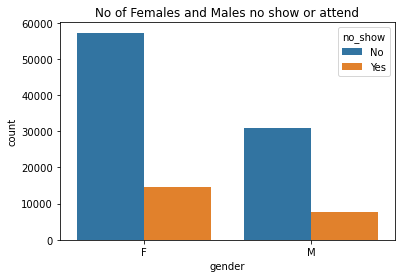

In [32]:
# plot how many femal and male showed up and how many did not.
display_table(df,'gender')
ax = sns.countplot(x=df.gender, hue=df.no_show, data=df)
ax.set_title("No of Females and Males no show or attend")
x_ticks_labels=['Female', 'Male']
plt.show();

The plot shows that the number of female visits is greater than that of male vistis, so it would make more sense to look at the no-show rate.

In [73]:
#function to calculte percentage and plot it
def percent_cal(x,title,label):
    # parameter coloumn name, title and label it calculate the the percentage for total value of this column from two different data frame
    # and plot pie chart for it.
    noshow_per=df_no_show[x].value_counts()/df[x].value_counts()*100
    noshow_per.plot.pie(autopct='%1.1f%%', shadow=True, labels=label);
    plt.title(title);

Calculate the percentage of female and male visits no shows and present will give more accurate view.

In [34]:
#function to display(no_show_table with percentage). 
def no_show_table(df,col,l):
    tabel_per=df.groupby([col,'no_show'], as_index=False)['patientid'].count()#make data fram fro selected columns
    no_show_table=tabel_per[tabel_per['no_show']=="Yes"]# select no-show record
    no_show_table=no_show_table.rename(columns={'patientid':'total_no show'})# change column name
    no_show_table.drop('no_show', axis=1, inplace=True)# drop inrequired table
    no_show_table=no_show_table.set_index(col)
    no_show_table['%']=l# append % col
    display(no_show_table)    

,total_no show,%
gender,,
F,14590,50.4%
M,7725,49.6%


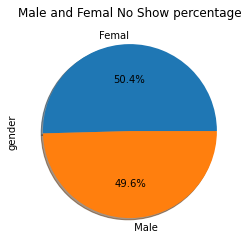

In [74]:
# plot gender percentage.
l=['50.4%','49.6%']
no_show_table(df,'gender',l)
label=['Femal', ' Male']
percent_cal(x='gender',title="Male and Femal No Show percentage", label = label)

The percentage of female and male no show is very close.
50% are femal and 49% are male

### Research Question 2  ( Is no show increase in specific  days ?)

Display number of presents and no-shows per day

,no_show,total
appointment_week_day,,
Fri,No,14981
Fri,Yes,4037
Mon,No,18023
Mon,Yes,4689
Sat,No,30
Sat,Yes,9
Thu,No,13909
Thu,Yes,3335
Tue,No,20488


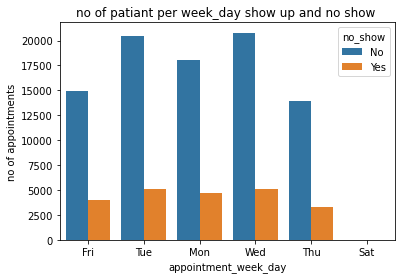

In [49]:
# plot how many showed up and how many did not by day.
display_table(df,'appointment_week_day')
ax = sns.countplot(x=df.appointment_week_day, hue=df.no_show, data=df)
ax.set_title("no of patiant per week_day show up and no show ")
plt.ylabel("no of appointments")
plt.show();

During the week, Tuesdays and Wednesdays tend to be the busiest days, but no shows seem to be close on any given day.


,total_no show,%
appointment_week_day,,
Fri,4037,17.2%
Mon,4689,16.6%
Sat,9,18.6%
Thu,3335,15.6%
Tue,5152,16.2%
Wed,5093,15.9%


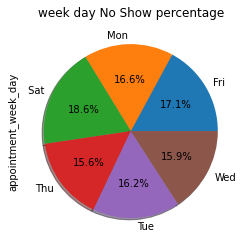

In [75]:
# plot no-show % per day.
day_per=['17.2%','16.6%', ' 18.6%','15.6%','16.2%','15.9%']
no_show_table(df,'appointment_week_day',day_per)
label=['Fri','Mon', ' Sat','Thu','Tue','Wed']
percent_cal(x='appointment_week_day',title="week day No Show percentage", label = label)

No-Show percentage as per week days are very close, Sat has the lowest number of appointmens and highr percentage of no-shows
but it seems weekday doesnot effect no-Shows.

### Research Question 3  ( Will it be considered a no show if the patient does not show up more than once? )

First, add a counter that help to count how many times every guest has visited and find total visits, no show and present per 
patient.

In [38]:
df['visits_counter'] = 1 # add 'visits_counter' column.
df_visits=df.groupby(['patientid','no_show'], as_index=False)['visits_counter'].count()#find no# present and no-show per patient.
df_total_visit=df.groupby(['patientid'], as_index=False)['visits_counter'].count()#find total number of visits per patient.
df_total_visit.rename(columns={'visits_counter':'total_visits'}, inplace=True)#rename visits_counter .
df_visits=pd.merge(df_visits,df_total_visit, on=['patientid'], how='left')# merge two dataframe 
# new data frame with no# no-shows, presents, total-visits per patient_ID
df_visits.head(2)

,patientid,no_show,visits_counter,total_visits
0,11111462625267,No,1,1
1,111124532532143,No,1,2


Secondly, plot the number of patients who are present and not present based on their number of visits.

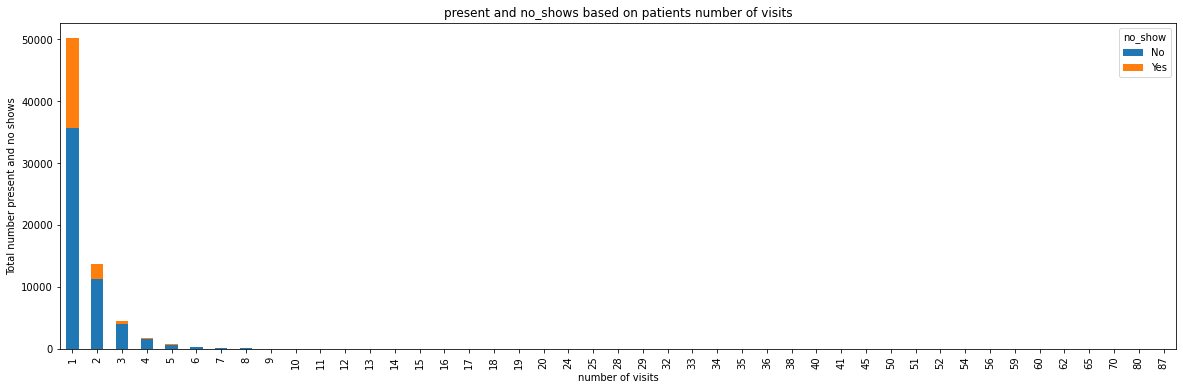

In [39]:
# plot no# no-shows and present based on total no# of visit.
df_visits.groupby(['visits_counter', 'no_show'])['visits_counter'].count().unstack('no_show').plot(kind='bar',stacked=True,figsize=(20,6));
plt.title("present and no_shows based on patients number of visits");
plt.ylabel('Total number present and no shows');
plt.xlabel('number of visits');

New patients who visit only once seem to have a high no-show rate(First important Figuer)
Further investigation is needed in this point, so I will calculate the percentage of new patients who do not show up from all no shows

In [40]:
new_no_show=df_visits.query('total_visits==1 & no_show == "Yes"')# new patient no shows
new_no_show['patientid'].duplicated().sum()# sure no duplicated patientid.
print("Total new patient who did not show up is :",new_no_show.shape[0],"appointments")#total new patient who make no show

Total new patient who did not show up is : 7118 appointments


In [41]:
#  no-show patients % of all no show patients.
print("new no-show patients % of all no show patients :",np.round((new_no_show.shape[0]/df_no_show.patientid.nunique()*100),decimals=2),'%')

new no-show patients % of all no show patients : 40.3 %


In [42]:
#  no-show patients % of all no show patients.
print("new patients no_shows % of all no shows :",np.round((new_no_show.visits_counter.sum()/df['no_show'].value_counts()[1]*100),decimals=2),'%')

new patients no_shows % of all no shows : 31.9 %


New visitors make up 40% of no-shows, and they represent 31% of total no-shows.

Third,Calculate the percent of repeated no-show patients who make more than one no-show out of all patients who don't show up.


In [43]:
repeated_no_show=df_visits.query('visits_counter>1 & no_show == "Yes"')#repeated patient no shows
#repeated_no_show =total_no_show.query('no_show>2')#find repeated no-show patients.
repeated_no_show['patientid'].duplicated().sum()# sure no duplicated patientid.
print("Total repeated no show patients is :",repeated_no_show.shape[0],"patients")

Total repeated no show patients is : 3224 patients


In [44]:
#  no-show patients % of all no show patients.
print("Repeated no-show patients % of all no show patients :", np.round((repeated_no_show.shape[0]/df_no_show.patientid.nunique()*100),decimals=2),'%')

Repeated no-show patients % of all no show patients : 18.25 %


Now, Find their percentage of all no shows.

In [45]:
print("No_show % from repeated no-show patients is",np.round((repeated_no_show.visits_counter.sum()/df['no_show'].value_counts()[1]*100),decimals=2),'%')

No_show % from repeated no-show patients is 35.3 %


Repeated no-shows patients made up 18% of all no-shows patients, and they represented 35% of total no-shows.

### Research Question 4  ( Is difference days between appointment and schadule affect ?)

diff_no_days    0            10          20          30          40         \
no_show          No   Yes     No   Yes    No   Yes    No   Yes    No   Yes   
no_show       54549  7256  14994  5974  8095  4032  5426  2547  2452  1322   

diff_no_days  ... 130 140     150 160     170     180      
no_show       ... Yes  No Yes Yes  No Yes  No Yes  No Yes  
no_show       ...   6   5   4   2  13   8   7   1  18   8  

[1 rows x 36 columns]

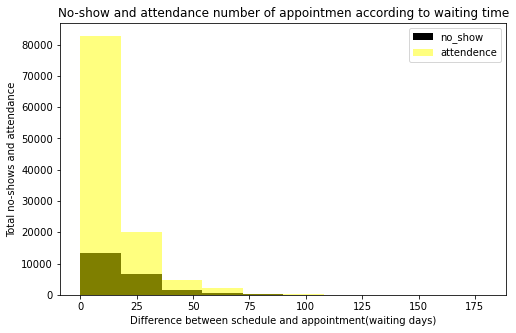

In [69]:
# plot no-show and present appoinymens as per difference no# days.
display((pd.DataFrame(df.groupby('diff_no_days')['no_show'].value_counts())).T)
df_no_show['diff_no_days'].plot.hist(figsize=(8,5),label='no_show',color='black',legend=True);
df['diff_no_days'].plot.hist(figsize=(8,5),label ='attendence',color='yellow',legend=True,alpha=.5);
plt.title("No-show and attendance number of appointmen according to waiting time");
plt.xlabel("Difference between schedule and appointment(waiting days)");
plt.ylabel("Total no-shows and attendance");


Difference between the number of show up and no show patients are getting closer when the waiting time gets bigger.

<a id='conclusions'></a>
## Conclusions
According to the dataset, the show up appointment was 88205 with
From a total of 110520 records, 22315 were no show (aprox 20%).

Chronic conditions (Alcoholism, Diabetes, Hypertension, Diabetes, Diabetes, etc.) or those on scholarships are very few compared to all other patients.
A long-term sample would be more useful, since I think their share will become clearer.
 A large portion of those who didn't show up didn't get SMS, but a nearby proportion received it.
The number of female visits exceeds the number of male visits, but both have similar rate of no-show .(50.4% per female, and 49.6% per male).
Tuesdays and Wednesdays tend to be the busiest days, but no shows seem to be close on any given day.
##  Here are the most important figures:
1) Patients who made only one reservation and did not show up for their appointment make up a 40% from  no-show patients,and 31% from total no-shows.

2) Repeated no-show patients is 18.25 % from all patients and made 35.3 % from total no-shows appointments.

3) Difference between the number of  show up and no show patients are getting closer when the difference number of days gets bigger.

<a id='conclusions'></a>
## Limitation and recommendation: 
    1) What is the medical specialty requested for every record or the visiting reason?
        relation between no-shows and medical specialty may help to figure the no-show reason.
    2) I think No-show must clarified (is it delay, or did not attend at all).
    3) Appointment Time (hours and minutes) in all the rows is same that is 00:00:00?
       I think it is important figure out the time may no-show related to the rush times
    4) Very low number of vistor in Sat comparing other days, Is it correct number or is it missing data?
    5) Did the patients request exact time for appointment and they take the available time?
       I think column with reequested time will be helpful.
    6) Better to take data set from alike neighborhoods(industrial area, urban, village,...)
    7) Sample is very small comparing to covered geographic area. I think this small sample is appropriate for one hospital.   
    8) Sample over 12 months and compare data by months.
    9) If it is possible to add weather condition during no-shows days.
    10) there are 4 catagories of handicap, it must be clear what are those categories.

I think more investigation why do a large amount of patients reserve one appointment and then no-show?
may the medical specialty requested or the visiting reason give answer for this question.

    